# Introduction to supervised learning using sklearn

Installing skicit learn: `pip install scikit-learn` 

## Pre-requisite
Take as a starting point your "cleaned dataset":
- You should only have variables that contain useful information
- You should have a solution for your N/A values (to go beyond simple value replacing: https://scikit-learn.org/stable/modules/impute.html)
- You should know your quantitative and qualitative variables
- You should have an idea **of the score you want to optimize**.

If you have a dataset with qualitative variables that you cannot drop, you should transform them using: one-hot encoding (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

> For this lab, if you are short on time, you can directly use only your **quantitative variables**, that you can store in `quantitative_df`.

In [69]:
# Load my demonstration dataset (you should use the dataset you will use for the project)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../pokemon.csv")

## Introduction to sklearn
`sklearn` (https://scikit-learn.org/stable/index.html) is one of the most popular library for Machine Learning in Python and is a must know for any data scientist.
It provides plenty of different utilities for Machine Learning:
- Preprocessing
- Dimensionality reduction
- Clustering algorithm
- Classification algorithms

Today we will learn the basic of using sklearn for **classification on the dataset you have chosen**.

### Sklearn basics for classification

`sklearn` relies on using classes to create classifiers. A classifier is any class with a method `.fit` and `.predict`:
- `.fit`: trains the model on the dataset.
- `.predict`: predicts the score on an input vector.

Each of these methods take as input `numpy.array` (to transform a `pandas.DataFrame` into a numpy array use the `values` method).

### Example for a random classifier on the Pokemon dataset

In [4]:
from sklearn.dummy import DummyClassifier

In [72]:
# My target is legendary 
df = df.dropna()

y = df.is_legendary.values
# I will only take 2 quantitative as X for demonstration
# I need to remove NA variables
X = df[['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
        'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male',
       'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation']].values


In [71]:
df.shape

(801, 41)

In [73]:
# I create an object of class DummyClassifier
dummy_classifier = DummyClassifier(strategy="constant", constant=0)

# I train it
dummy_classifier.fit(X, y)

DummyClassifier(constant=0, strategy='constant')

I can use the `predict` method to predict on my features `X`.

In [7]:
prediction = dummy_classifier.predict(X)

I can then compute the accuracy score of my model (for a list of all available scores on sklearn read: https://scikit-learn.org/stable/modules/model_evaluation.html), by comparing my vector `prediction` and my ground truth vector `y`.

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy = accuracy_score(y, prediction)

In [10]:
print("========= Accuracy of dummy classifier ============")
print(accuracy)

========= Accuracy of dummy classifier ============
0.9126092384519351


I can also perform further analysis on my classification, for example by plotting the results side by side.

Text(0, 0.5, 'Speed')

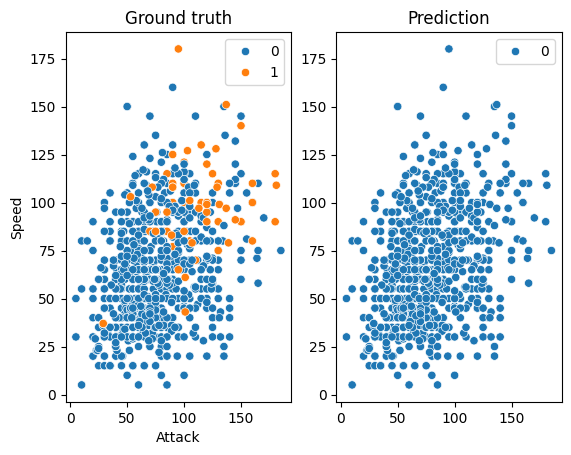

In [11]:
fig, ax =plt.subplots(1,2)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=ax[0])
ax[0].set_title("Ground truth")
ax[0].set_xlabel("Attack")
ax[0].set_ylabel("Speed")

sns.scatterplot(x=X[:,0], y=X[:,1], hue=prediction, ax=ax[1])
ax[1].set_title("Prediction")
ax[0].set_xlabel("Attack")
ax[0].set_ylabel("Speed")

**Exercice**: 
- Compute the *recall* and the *precision* on the prediction of the dummy classifier and conclude regarding the importance of using several scoring metrics. What is your remark regarding the precision and how can you explain it ?
- *Bonus*: re-code the *recall*, *accuracy*, *precision* (good for you if you want to revise the course!)
- *Bonus*: What are your remarks concerning a 91% accuracy score for a dummy classifier ? What can you compare it to ?

In [15]:
from sklearn.metrics import recall_score, precision_score

y_predict = dummy_classifier.predict(X)
print(recall_score(y_predict, y))
print(precision_score(y_predict, y))

0.0
0.0


/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
sum(y==1)

70

In [17]:
sum(y_predict==1)

0

## Using K-nearest neigbhor classifier

**Exercice**:
Using the class `KNeighborsClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (**read the doc beforehand!**), run:
- A KNeighborsClassifier with $k \in \{1, 3, 5, 7, 9\}$ and $dist \in {euclidean, manhattan}$

- *Bonus*: Test other distances, **and be critical about it!**, especially if you have qualitative variable.
- *Bonus++*: Create your own distance, especially if you're working with a mix of quantitative/qualitative/ordinal variables. 

- Plot on the same plot the *accuracy* score, the *recall* score, the *precision* score, as a function of $k$ for each distance (and put them side by side).

- "Conclude" regarding:
    - The performance of knn in general on your dataset
    - The best $k$ to select
    - The best distance to select
- *Bonus*: perform a deeper analysis of your classifier, using graphical and statistical tools to analyze the records that were misclassified, and try explaining the results.

**Question**: why is what we just did not sufficient to conclude ?

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
X

array([[  1. ,   1. ,   1. , ...,  45. ,   6.9,   1. ],
       [  1. ,   1. ,   1. , ...,  60. ,  13. ,   1. ],
       [  1. ,   1. ,   1. , ...,  80. , 100. ,   1. ],
       ...,
       [  1. ,   1. ,   2. , ...,  36. , 185. ,   7. ],
       [  0.5,   0.5,   2. , ...,  65. ,  47. ,   7. ],
       [  0.5,   0.5,   2. , ...,  85. ,  78.2,   7. ]])

In [81]:
accuracy_scores_euc = []
precision_scores_euc = []
recall_scores_euc = []

for k in [1, 3, 5, 7, 9]:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    print("======= Train KNN")
    knn.fit(X, y)
    print("======= Predict on training data")
    prediction = knn.predict(X)
    accuracy_scores_euc.append(accuracy_score(prediction, y))
    precision_scores_euc.append(precision_score(prediction, y))
    recall_scores_euc.append(recall_score(prediction, y))
    
accuracy_scores_man = []
precision_scores_man = []
recall_scores_man = []

neighbors = [1, 3, 5, 7, 9]

for k in neighbors:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    print("======= Train KNN")
    knn.fit(X, y)
    print("======= Predict on training data")
    prediction = knn.predict(X)
    accuracy_scores_man.append(accuracy_score(prediction, y))
    precision_scores_man.append(precision_score(prediction, y))
    recall_scores_man.append(recall_score(prediction, y))

k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data
k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data


/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
accuracy_scores_man

[1.0,
 0.9970501474926253,
 0.9970501474926253,
 0.9970501474926253,
 0.9852507374631269]

In [83]:
sum(prediction == y)

334

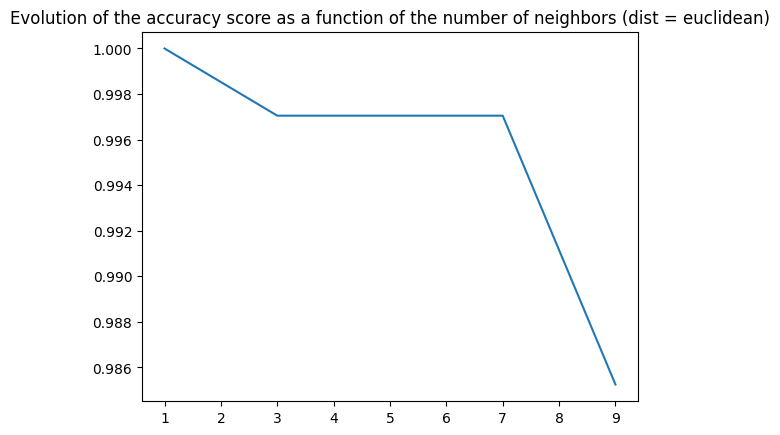

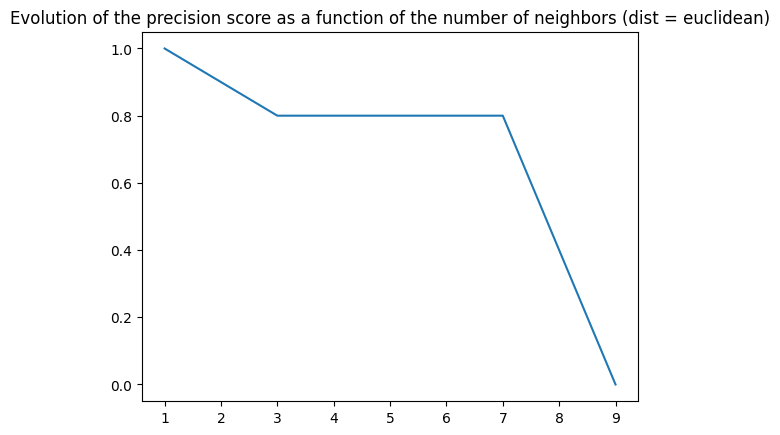

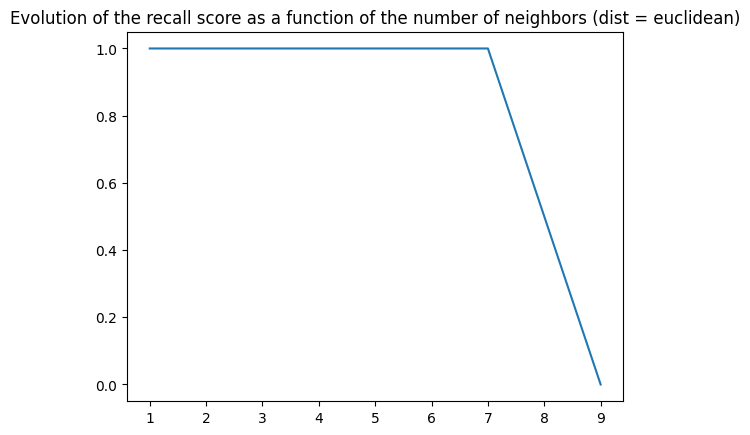

In [84]:
plt.plot(neighbors, accuracy_scores_euc)
plt.title("Evolution of the accuracy score as a function of the number of neighbors (dist = euclidean)")
plt.show()

plt.plot(neighbors, precision_scores_euc)
plt.title("Evolution of the precision score as a function of the number of neighbors (dist = euclidean)")

plt.show()

plt.plot(neighbors, recall_scores_euc)
plt.title("Evolution of the recall score as a function of the number of neighbors (dist = euclidean)")

plt.show()

## Splitting into train and test
It is impossible to conclude regarding the efficiency of a classification algorithms without at least splitting into **train and test**!

We will use the utilities provided by `sklearn`: https://scikit-learn.org/stable/modules/cross_validation.html.

In [16]:
from sklearn.model_selection import train_test_split

In [105]:
# Split intro 4 datasets: X_train, y_train, X_test, y_test, with a 70% / 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Exercice**: 
- Compute the accuracy, recall, precision on the train and test datasets and compare.
- Vary the values of $k$ and of the distance and select the best combination.
- Conclude regarding the performance of KNN on your dataset by running it on the whole dataset once a gain.
- *Bonus*: perform the same exercice, but this time using **stratified splits** (`stratify` argument set to the `y` values). What is the point of using `stratified` splits ? Does this make sense to solve your own problem ?

**Question**: what are the limits of train/test split ?

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

split_accuracy = []
split_precision = []
for i in range(1, 10, 1):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train, y_train)
    print(f"k={i}")
    prediction = knn.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))

k=1
Accuracy: 0.9901960784313726
k=2
Accuracy: 0.9901960784313726
k=3
Accuracy: 0.9901960784313726
k=4
Accuracy: 0.9901960784313726
k=5
Accuracy: 0.9901960784313726
k=6
Accuracy: 0.9803921568627451
k=7
Accuracy: 0.9803921568627451
k=8
Accuracy: 0.9803921568627451
k=9
Accuracy: 0.9803921568627451


/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sophrobhayek/Documents/dev/miashs_introduction_ml/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this beh

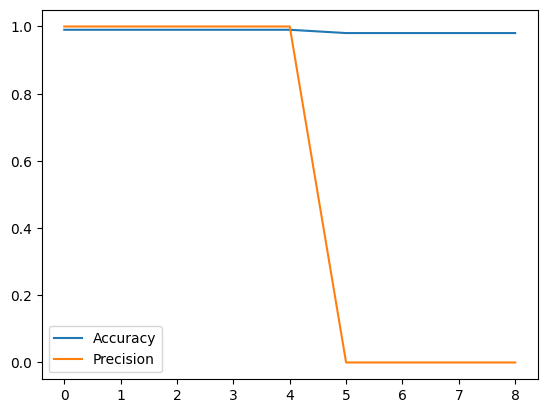

In [111]:
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.legend()

## Cross validation
To overcome the limits of a simple train/test split, cross-validation is a solution. We will use *k-fold* cross validation, using the function `cross_val_score` on the `DummyClassifier`, and compute the accuracy.

In [112]:
from sklearn.model_selection import cross_val_score

In [69]:
cross_val_accuracy = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="accuracy")
cross_val_precision = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="precision")

/home/mimsy/Documents/teaching/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mimsy/Documents/teaching/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mimsy/Documents/teaching/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mimsy/Documents/teaching/venv/lib/python3.10/s

In [70]:
print("========================================")
print(f"=== Average accuracy: {np.mean(cross_val_accuracy)}")
print(f"=== Median accuracy: {np.median(cross_val_accuracy)}")
print("========================================")
print("========================================")

print(f"=== Average precision: {np.mean(cross_val_precision)}")
print(f"=== Median precision: {np.median(cross_val_precision)}")
print("========================================")


=== Average accuracy: 0.6161634548992531
=== Median accuracy: 0.6179775280898876
=== Average precision: 0.0
=== Median precision: 0.0


**Exercice**:
- Perform $k$ fold validation on the K-Neighbors Classifier
- Compute the mean accuracy, precision and recall on your $k-fold$ and plot it as a function of $k$ and of the distance.
- Select the new best value of $k$ and of the distance.
- Train your final model.
- *Bonus+*: perform stratified k-fold validation. 

In [113]:
cross_val_accuracies = []
cross_val_accuracies_std = []
for k_neighbor in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k_neighbor)
    print("======== Score on fold")
    cross_val_accuracy = np.median(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=5))
    cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=5))
    print(f"Standard error on fold: {cross_val_accuracy_std}")
    cross_val_accuracies.append(cross_val_accuracy)
    cross_val_accuracies_std.append(cross_val_accuracy_std)

======== Score on fold
Standard error on fold: 0.007204381596421085
======== Score on fold
Standard error on fold: 0.00588235294117645
======== Score on fold
Standard error on fold: 0.00588235294117645
======== Score on fold
Standard error on fold: 8.779631255491082e-05
======== Score on fold
Standard error on fold: 8.779631255491082e-05
======== Score on fold
Standard error on fold: 8.779631255491082e-05
======== Score on fold
Standard error on fold: 8.779631255491082e-05


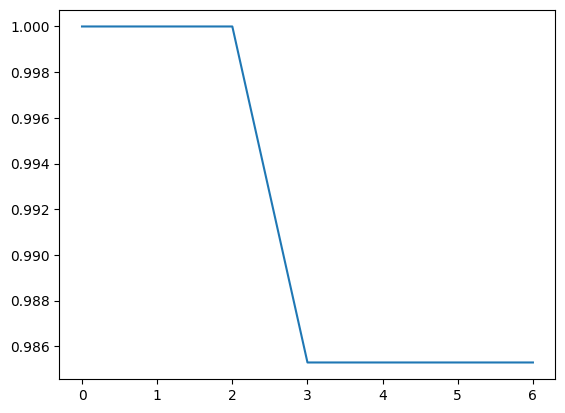

In [115]:
plt.plot(cross_val_accuracies)

## Bonus: Playing with the features
During the data analysis phase, you had different insight regarding features (and may have dropped some). 

You can now test your intuition (at least using KNN):

For different distances and different values of $k$,
- Start with 0 feature and find the 1 with the best score (**using the score you have chosen**)
- Iteratively add the feature that maximizes the score.
- Stop when the score does not improve / decreases and keep the set of feature.



*Bonus+*: run it again with different scores and conclude.

> *If you want to go further than we probably will in class, see: https://scikit-learn.org/stable/modules/feature_selection.html*

## Conclusion
You can already work on your project, by cleaning up the results you obtained and redacting your experiments. **Even failed experiments (i.e. you are not happy with the score you have with this method) are interesting experiments and will show your expertise !**

Ask yourselves the following questions:
- Am I happy with the current encoding of my variables ?
- Am I happy with the score I selected and I want to maximize ?
- Do I understand well what we did today and why we did it ?
- What are the limits of the approach you took today with KNN (in terms of distance, hyperparameters...) ? Do you think this is a good approach for your dataset ?